In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
Data = pd.read_csv("pulsar_stars.csv")

In [4]:
Data.target_class.value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [5]:
Data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
Data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [7]:
#feature selection using backward elimination
X1 = Data[' Excess kurtosis of the integrated profile']
X2 = Data[' Mean of the DM-SNR curve']
X3 = Data[' Standard deviation of the DM-SNR curve']
X4 = Data[' Excess kurtosis of the DM-SNR curve']
X5 = Data[' Skewness of the DM-SNR curve']
Y = Data['target_class']

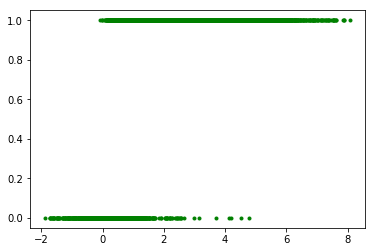

In [8]:
plt.plot(X1, Y, 'g.')

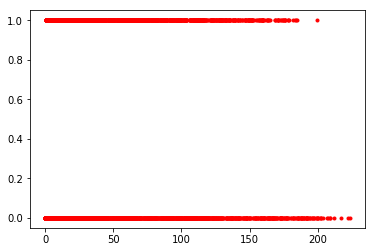

In [9]:
plt.plot(X2, Y, 'r.')

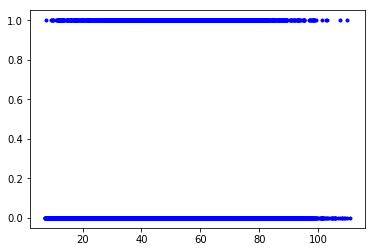

In [10]:
plt.plot(X3, Y, 'b.')

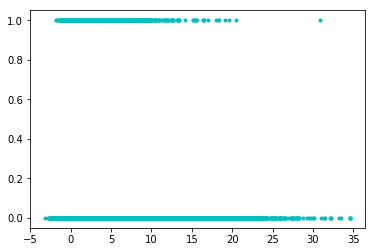

In [11]:
plt.plot(X4, Y, 'c.')

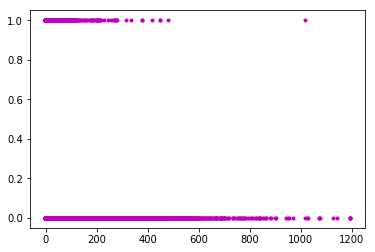

In [12]:
plt.plot(X5, Y, 'm.')

In [13]:
x1 = np.array(X1)
x2 = np.array(X2)
x3 = np.array(X3)
x4 = np.array(X4)
x5 = np.array(X5)
y = np.array(Y)

In [14]:
x1 = (x1 - x1.min()) / (x1.max() - x1.min())
x2 = (x2 - x2.min()) / (x2.max() - x2.min())
x3 = (x3 - x3.min()) / (x3.max() - x3.min())
x4 = (x4 - x4.min()) / (x4.max() - x4.min())
x5 = (x5 - x5.min()) / (x5.max() - x5.min())

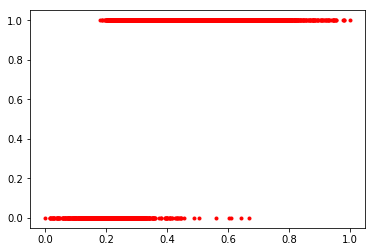

In [15]:
plt.plot(x1, y,'r.')

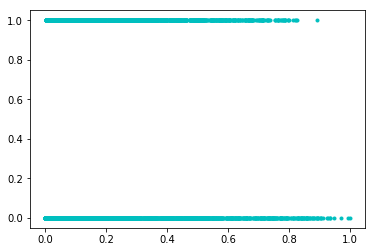

In [16]:
plt.plot(x2, y,'c.')

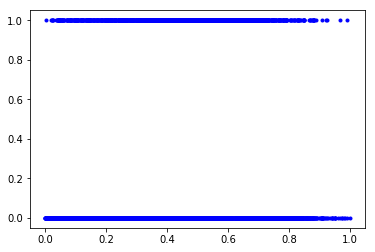

In [17]:
plt.plot(x3, y,'b.')

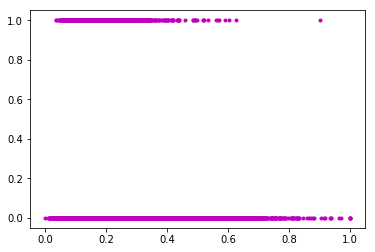

In [18]:
plt.plot(x4, y,'m.')

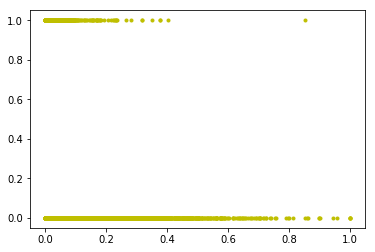

In [19]:
plt.plot(x5, y,'y.')

In [20]:
x1_train, x1_test, x2_train, x2_test, x3_train, x3_test, x4_train, x4_test, x5_train, x5_test, y_train, y_test = train_test_split(x1, x2, x3, x4, x5, y, test_size = 0.25, random_state = 7823)

In [21]:
def hypothesis(a, x1, b, x2, c, x3, d, x4, e, x5, f):
    return 1 / (1 + np.exp(- (a * x1 + b * x2 + c * x3 + d * x4 + e * x5 + f)))

In [22]:
def error(a, x1, b, x2, c, x3, d, x4, e, x5, f, y):
    err = 0
    m = len(x1)
    
    for i in range(m):
        err += -(y[i] * np.log(hypothesis(a, x1[i], b, x2[i], c, x3[i], d, x4[i], e, x5[i], f))) - ((1 - y[i]) * np.log(1 - hypothesis(a, x1[i], b, x2[i], c, x3[i], d, x4[i], e, x5[i], f)))
        
    return (1/ m) * err

In [23]:
def step_gradient(a, x1, b, x2, c, x3, d, x4, e, x5, f, y, learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    grad_d = 0
    grad_e = 0
    grad_f = 0
    
    m = len(x1)
    
    for i in range(m):
        grad_a += (hypothesis(a, x1[i], b, x2[i], c, x3[i], d, x4[i], e, x5[i], f) - y[i]) * x1[i]
        grad_b += (hypothesis(a, x1[i], b, x2[i], c, x3[i], d, x4[i], e, x5[i], f) - y[i]) * x2[i]
        grad_c += (hypothesis(a, x1[i], b, x2[i], c, x3[i], d, x4[i], e, x5[i], f) - y[i]) * x3[i]
        grad_d += (hypothesis(a, x1[i], b, x2[i], c, x3[i], d, x4[i], e, x5[i], f) - y[i]) * x4[i]
        grad_e += (hypothesis(a, x1[i], b, x2[i], c, x3[i], d, x4[i], e, x5[i], f) - y[i]) * x5[i]
        grad_f += (hypothesis(a, x1[i], b, x2[i], c, x3[i], d, x4[i], e, x5[i], f) - y[i]) 
    
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    d = d - (grad_d * learning_rate)
    e = e - (grad_e * learning_rate)
    f = f - (grad_f * learning_rate)
    
    return a, b, c, d, e, f

In [24]:
def descend(init_a, x1, init_b, x2, init_c, x3, init_d, x4, init_e, x5, init_f, y, learning_rate, iterations):
    a = init_a
    b = init_b
    c = init_c
    d = init_d
    e = init_e
    f = init_f
    
    for i in range(iterations):
        err = error(a, x1, b, x2, c, x3, d, x4, e, x5, f, y)
        
        if i % 1000 == 0:
            print(f"error: {err}, a:{a}, b:{b}, c:{c}, d:{d}, e:{e}, f:{f}")
            
        a, b, c, d, e, f = step_gradient(a, x1, b, x2, c, x3, d, x4, e, x5, f, y, learning_rate)
        
    return a, b, c, d, e, f 

In [25]:
init_a = 25.879149494685304
init_b = -3.8507936679048567
init_c = 3.5524032890030957
init_d = -4.3498189749301694
init_e = -1.6928897378090226
init_f = -8.698810221996721
iterations = 10000
learning_rate = 0.0001

In [26]:
final_a, final_b, final_c, final_d, final_e, final_f = descend(init_a, x1_train, init_b, x2_train, init_c, x3_train, init_d, x4_train, init_e, x5_train, init_f, y_train, learning_rate, iterations)

error: 0.08033517451061492, a:25.879149494685304, b:-3.8507936679048567, c:3.5524032890030957, d:-4.3498189749301694, e:-1.6928897378090226, f:-8.698810221996721
error: 0.07978685554012402, a:26.681449485758062, b:-3.9787111889296543, c:3.627360345895758, d:-4.283473823931819, e:-1.6008554357582376, f:-8.937013403188507
error: 0.07934315104221433, a:27.399234655174425, b:-4.092921297880703, c:3.701192474005486, d:-4.212376243478106, e:-1.5082641116337545, f:-9.155498741923115
error: 0.07897927902899572, a:28.04558305887885, b:-4.196333736610417, c:3.7737570707109818, d:-4.138694441587742, e:-1.4166477770483121, f:-9.356765895586616
error: 0.07867762176091629, a:28.630740805636755, b:-4.291055103739205, c:3.844887534344703, d:-4.064006562791113, e:-1.3271244779002958, f:-9.542796313007425
error: 0.07842530047480283, a:29.16290387008221, b:-4.378636315636653, c:3.914415592128073, d:-3.9894666563791854, e:-1.240509836770427, f:-9.715200114179593
error: 0.07821267551288304, a:29.6487436783

In [27]:
final_a, final_b, final_c, final_d, final_e, final_f

(31.226703899364967,
 -4.741470720818833,
 4.2332277765875865,
 -3.6412529817111343,
 -0.8661507658963924,
 -10.413317980192803)

In [28]:
error(final_a, x1_train, final_b, x2_train, final_c, x3_train, final_d, x4_train, final_e, x5_train, final_f, y_train)

0.07763399502123551

In [29]:
error(final_a, x1_test, final_b, x2_test, final_c, x3_test, final_d, x4_test, final_e, x5_test, final_f, y_test)

0.07709771428222044

In [30]:
def accuracy(a, x1, b, x2, c, x3, d, x4, e, x5, f, y):
    correct = 0
    m = len(x1)
    
    for i in range(m):
        pred = hypothesis(a, x1[i], b, x2[i], c, x3[i], d, x4[i], e, x5[i], f)
        
        if pred > 0.5:
            z = 1
        else:
            z = 0
            
        if y[i] == z:
            correct += 1
            
    print(f"Accuracy: {correct/len(y)}")        

In [31]:
accuracy(final_a, x1_train, final_b, x2_train, final_c, x3_train, final_d, x4_train, final_e, x5_train, final_f, y_train)

Accuracy: 0.9767563137897638


In [32]:
accuracy(final_a, x1_test, final_b, x2_test, final_c, x3_test, final_d, x4_test, final_e, x5_test, final_f, y_test)

Accuracy: 0.9776536312849162


## What is a Pulsar star?

Pulsar stars are highly magnetized, rapidly spinning neutron stars. A neutron star is formed during an explosion of a star that is at least 8 solar masses, called supernova. As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, it produces a detectable pattern of broadband radio emission. As they rotate rapidly, this pattern repeats periodically. Thus, pulsar search involves looking for periodic radio signals with large radio telescopes.

This HTRU2 dataset has different pulsar candidates, collected from the High Time Resolution Universe (HTRU) survey for radio pulsars using Parkes radio telescope. Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile. This is an array of continuous variables that describe the average emission from a neutron star as a function of its rotational phase, across all the observed time and frequencies. The remaining four variables are similarly obtained from the DM-SNR curve, which shows how the detected signal-to-noise ratio (SNR) varies with dispersion measure (DM). Signal-to-noise ratio describes the strength of the signal compared to random noise and dispersion measure is the integrated column density of free electrons between the observer and the pulsar. These are listed below: 

1. Mean of the integrated profile. 
2. Standard deviation of the integrated profile. 
3. Excess kurtosis of the integrated profile. 
4. Skewness of the integrated profile. 
5. Mean of the DM-SNR curve. 
6. Standard deviation of the DM-SNR curve. 
7. Excess kurtosis of the DM-SNR curve. 
8. Skewness of the DM-SNR curve. 

These are the feature data extracted using the Pulsar Feature Lab tool, which is a collection of python scripts useful for extracting machine learning features from pulsar candidate files.



The dataset contains 17,898 candidates, classified into two classes; 1,639 datapoints belonging to positive or class 1 and the rest 16,259 belonging to negative or class 0. This is a binary classification problem, for which logistic regression algorithm is used to predict whether a candidate is a pulsar star or not. It is chosen over k-NN statistical model, as it is found to have a better accuracy. The raw code is validated using scikit-learn.

To select the optimal feature set with respect to the target, backward elimination method is used. Initially, the model is trained and tested using all the 8 features, gradually removing the least significant feature at each iteration. Thus, improving the performance of the model to attain maximum accuracy. 
